## Exploring training curves
 - Partially based on notebook 4.4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [3]:
import keras

Using TensorFlow backend.


In [4]:
from keras import layers, models

In [5]:
from keras.datasets import imdb

## Loading IMDB data, but only using 5k reviews

In [31]:

from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results.astype('float32')

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Reduce the data to speed up things
x_train = x_train[:5000]
y_train = y_train[:5000]

# Reduce the data to speed up things
x_test = x_test[:5000]
y_test = y_test[:5000]

In [10]:
x_train.shape

(5000, 10000)

In [40]:
from keras import models
from keras import layers
from keras import optimizers

In [ ]:
dropouts = [0, 0.3, 0.5]
hists = []

for do in dropouts:
    print('Starting with ', do)
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dropout(do))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                           loss='binary_crossentropy',
                           metrics=['acc'])
    hist = model.fit(x_train, y_train,
                                   epochs=15,
                                   batch_size=512,
                                   verbose=2,  # 0 - print nothing, 2 - print one line per epoch, 1 - print running bar
                                   validation_data=(x_test, y_test))
    hists.append(hist)

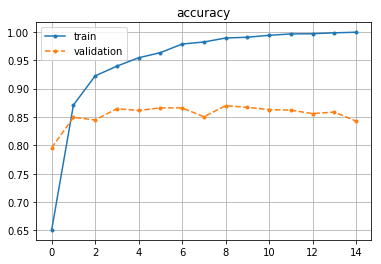

In [49]:
# Plot the 
plt.plot(hists[0].history['acc'], '.-' , label='train')
plt.plot(hists[0].history['val_acc'], '.--' , label='validation')
plt.legend()
plt.title('accuracy')
plt.grid()

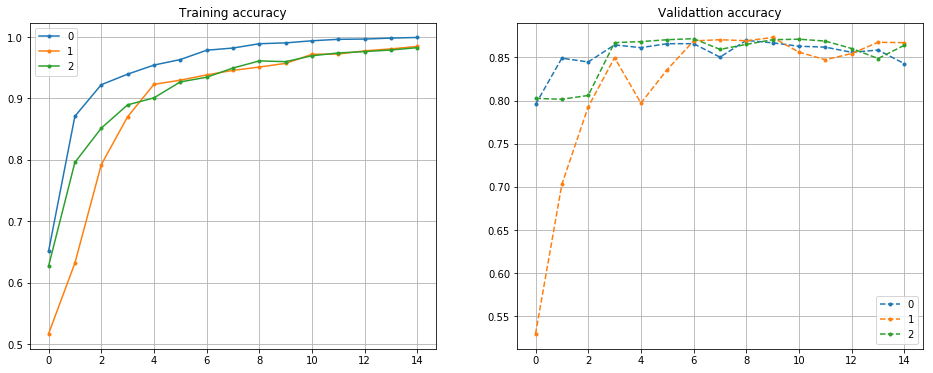

In [50]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
for i, hist in enumerate(hists):
    plt.plot(hist.history['acc'], '.-' , label='%d' % i)
plt.legend()
plt.title('Training accuracy')
plt.grid()


plt.subplot(1,2,2)
for i, hist in enumerate(hists):
    plt.plot(hist.history['val_acc'], '.--', label='%d' %i)
plt.legend()
plt.title('Validattion accuracy')
plt.grid()

## Further exploration

Plot and exlore the training and validation accuracy for the following cases
- network with 8, 16 and 32 nodes in the hidden layer(s)
- netork with 1, 2 and 3 hidden layers
- Try training with different learining rates by using optimizers.RMSprop(lr=0.001), use rates of 0.01, 0.001 and 0.0001

#### Also look for some of the looss curves (as opposed to accurace) for the cases above